# TRAINING A CLASSIFIER
- 인공신경망을 정의하는 법, loss 를 계산하는 법, 네트워크의 weight 를 업데이트하는 법을 안다면
- **데이터만 있다면** 이제 모델 학습 시작

>이때 비전 데이터를 이용하자면 **```torchvision```** 패키지를 사용할 수 있음
>- 널리 쓰이는 데이터셋에 대한 **dataloader** 제공
>- 이미지를 위한 다양한 변환 함수 제공

- 이 섹션에서는 **CIFAR 10** 데이터셋을 사용할 것임
- CIFAR 10 은 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 의 **10가지 클래스**로 이루어짐
- 각 이미지는 **(3, 32, 32)** 차원임

---
# Training an image classifier
1. ```torchvision``` 을 이용해 CIFAR 10 학습 및 테스트셋을 받고 정규화
2. CNN 정의
3. loss function 정의
4. 학습 데이터셋에 대하여 네트워크 학습
5. 테스트 데이터셋에 대하여 검증

---
# 1. Load and normalize CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

- torchvision 데이터셋의 각 이미지는 [0, 1] 범위를 가짐
- 이를 **transform** 하여 [-1, 1] 범위로 정규화할 것

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


- 다운받은 이미지를 몇 개 시각화하겠음

torch.Size([64, 3, 32, 32])


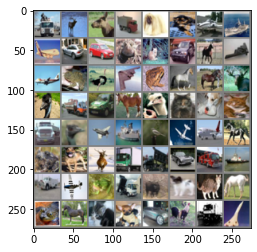

truck  deer  deer truck   dog   dog plane  ship plane   car   car  frog   cat   car horse plane plane  frog  bird plane  frog horse horse  deer  bird truck   car horse  bird   cat   dog   cat truck  bird plane  ship  bird plane plane horse  frog   dog  deer truck truck   car truck  ship truck plane  frog truck  deer   dog   cat horse  frog horse   cat   dog   car  bird truck plane


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

imshow(torchvision.utils.make_grid(images))  # 배치로 묶인 이미지들을 자동으로 grid 화
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

---
# 2. Define a Convolutional Neural Network

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = Net().to(device)

cuda:0


---
# 3. Define a Loss function and optimizer

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

---
# 4. Train the network
>**중요한 부분**
>- 데이터셋의 각 iteration 마다 어떻게 학습할 지에 대한 설계가 필요

In [25]:
for epoch in range(10):
    running_loss = 0.
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print("[{0}, {1:5d} loss: {2:.5f}]".format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.

print("Finished Training")

[1,   100 loss: 0.11520]
[1,   200 loss: 0.11507]
[1,   300 loss: 0.11503]
[1,   400 loss: 0.11493]
[1,   500 loss: 0.11488]
[1,   600 loss: 0.11471]
[1,   700 loss: 0.11449]
[2,   100 loss: 0.11358]
[2,   200 loss: 0.11226]
[2,   300 loss: 0.10950]
[2,   400 loss: 0.10525]
[2,   500 loss: 0.10300]
[2,   600 loss: 0.09987]
[2,   700 loss: 0.09804]
[3,   100 loss: 0.09608]
[3,   200 loss: 0.09520]
[3,   300 loss: 0.09428]
[3,   400 loss: 0.09239]
[3,   500 loss: 0.09224]
[3,   600 loss: 0.09136]
[3,   700 loss: 0.09027]
[4,   100 loss: 0.08935]
[4,   200 loss: 0.08758]
[4,   300 loss: 0.08582]
[4,   400 loss: 0.08474]
[4,   500 loss: 0.08554]
[4,   600 loss: 0.08512]
[4,   700 loss: 0.08275]
[5,   100 loss: 0.08076]
[5,   200 loss: 0.08128]
[5,   300 loss: 0.07986]
[5,   400 loss: 0.07884]
[5,   500 loss: 0.07793]
[5,   600 loss: 0.07847]
[5,   700 loss: 0.07577]
[6,   100 loss: 0.07504]
[6,   200 loss: 0.07492]
[6,   300 loss: 0.07506]
[6,   400 loss: 0.07467]
[6,   500 loss: 0.07395]


In [26]:
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

---
# 5. Test the network on the test data
- 학습 데이터셋에 대해 2 번 학습을 진행함
- 이제 학습이 잘 됐는지 검증해야 함
- 테스트셋에 대하여 예측을 진행하고 해당 예측이 정답과 같으면 예측이 맞다고 판단하는 식으로 진행

- 먼저 테스트셋 이미지를 시각화해봄

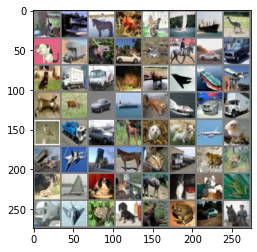

GroundTruth:    cat plane horse  frog   dog  ship  ship  bird   cat truck  frog   car  bird horse   car   car   dog truck truck  frog  deer plane  ship plane   cat  deer   car  ship   dog  ship   car truck  bird truck   car  deer   dog   dog plane   dog truck plane truck horse   cat truck  frog  deer  deer  ship   dog   cat horse   cat   cat  frog truck plane  frog   dog  deer  frog   car horse


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [27]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [28]:
outputs = net(images)
print(outputs)

tensor([[-0.6597, -1.7400,  1.1385,  2.1641,  0.3303,  2.0894,  0.6732,  1.1005,
         -1.9849,  0.4884],
        [ 4.5466, -1.2037,  2.3058, -0.8130,  2.3398, -1.9092, -1.6798, -0.6369,
          0.9088, -1.2404],
        [ 1.0724,  2.7798,  0.1652, -1.5217,  0.0171, -1.4535, -3.3781,  1.4210,
         -0.2926, -0.4283],
        [-0.6167, -1.2491,  0.0468,  1.4547, -0.0155,  0.3131,  2.0672,  0.9703,
         -0.8479,  0.9072],
        [-1.1494, -2.0681,  2.1104,  1.5324,  2.7077,  1.7694,  2.1795,  1.3791,
         -3.5012, -1.9181],
        [ 5.4226,  1.0564,  2.2837, -1.0130,  0.6517, -3.0468, -1.8288, -4.1017,
          2.7172, -1.4484],
        [-0.4758, -3.0825,  2.3544,  3.2051,  2.1163,  1.9144,  3.8293,  0.1531,
         -3.1821, -1.7618],
        [-1.8570, -3.2613,  3.0358,  1.8082,  4.6009,  1.5562,  2.5407,  2.8375,
         -3.2348, -4.0384],
        [ 1.2331, -0.9571,  1.0549, -0.1577,  1.1287, -0.7831,  0.7108,  0.2677,
          0.1073, -1.0013],
        [-0.5014, -

In [29]:
_, predicted = torch.max(outputs, 1)   # 차원 1에 대해서 가장 큰 값과 해당 값의 index 를 반환
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([2.1641, 4.5466, 2.7798, 2.0672, 2.7077, 5.4226, 3.8293, 4.6009, 1.2331,
        3.3461, 4.5112, 3.4802, 2.5600, 3.4460, 5.3996, 5.5643],
       grad_fn=<MaxBackward0>),
indices=tensor([3, 0, 1, 6, 4, 0, 6, 4, 0, 7, 8, 5, 3, 8, 0, 1]))


- 이제 전체 테스트셋에 대한 성능을 구하는 부분을 구현하겠음

In [30]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print("Accuracy of the network on the 10000 test images : %d %%" %(
100*correct / total))

Accuracy of the network on the 10000 test images : 54 %


- 어떤 클래스를 잘 맞췄고, 어떤 클래스를 못 맞췄는지 성능 검사

In [31]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 67.1 %
Accuracy for class car   is: 60.8 %
Accuracy for class bird  is: 40.0 %
Accuracy for class cat   is: 36.0 %
Accuracy for class deer  is: 33.7 %
Accuracy for class dog   is: 43.4 %
Accuracy for class frog  is: 70.3 %
Accuracy for class horse is: 67.3 %
Accuracy for class ship  is: 69.1 %
Accuracy for class truck is: 60.1 %
